## Final Results
##### **Reminder** 
###### RL algorithms presented in the following experiments differ in the training procedure, leading to different results in terms of efficiency on the number of updates to the networks and number of episodes generated during training.
- **A2C** (Advantage Actor Critic) is an on-policy algorithm that collects a number of frames with the current policy and performs a policy update. 
- **PPO** (Proximal Policy Optimization) is an on-policy algorithm that uses a trust region to ensure that the new policy does not deviate too much from the old policy.
  It collects a number of frames with the current policy and performs one or more policy updates on batches of the collected data.
- **SAC** (Soft Actor-Critic) is an off-policy algorithm with an actor-critic architecture that uses a maximum entropy framework to encourage exploration. 
- **TD3** (Twin Delayed Deep Deterministic Policy Gradient) is an off-policy algorithm similar to SAC that differs on the use of a deterministic policy to collect data and a pair of Q-functions to estimate the value of the state-action pairs. 
  Both of them use a replay buffer to store the collected data: after collecting *n* frames from the environment with the current policy, data is stored into the buffer, which is used from the algorithm to performs *n* policy updates by sampling mini-batches of data from it.


In [1]:
from utils import load_data, compute_ci, sanitize, get_save_path
import seaborn as sns
import matplotlib.pyplot as plt

def plot_ci(df, x, metrics, hue=None, col=None, save_path=None, log_scale=None, hue_order=None, col_order=None,
            x_label='RL Algorithm', legend_title='Environment\nInteraction\nSteps'):
    """
    :param df: dataframe
    :param x: variable to plot on x-axis
    :param metrics: dict of metrics to plot with their labels
    :param hue: hue to use for facetting
    :param col: column to use for facetting
    :param save_path: save path for the plot
    :param log_scale: bool or list of metrics to plot on log scale
    :param hue_order: 
    :param col_order: 
    :param x_label: x-axis label
    :param legend_title: legend title
    """
    for m, m_label in metrics.items():
        if hue is not None:
            hue_vals = df[hue].unique()
            assert len(hue_vals) > 1, f'There is only one unique val for {hue}, cannot use it as hue'
            palette = dict(zip(hue_vals, sns.color_palette(palette='deep', n_colors=len(hue_vals))))
            plot_kwargs = {'palette': palette, 'hue': hue, 'hue_order': hue_order, 'dodge': 0.5, 'col_order': col_order}
        else:
            plot_kwargs = {}
        cplot = sns.catplot(df, x=x, y=m, kind='point', linestyles='', capsize=0.1, 
                            errorbar=lambda p: compute_ci(p), col=col, **plot_kwargs)
        cplot.fig.subplots_adjust(top=.87)
        cplot.set_axis_labels(x_label, sanitize(m, '/').capitalize())
        cplot.fig.suptitle(m_label)
        cplot.legend.set_title(legend_title)
        cplot.set_titles('{col_name}')
        if log_scale and m in log_scale:
            if col:
                for ax in cplot.axes.flat:
                    ax.set_yscale('log')
            else:
                cplot.ax.set_yscale('log')
        plt.show()
        if save_path:
            fig_name = f'{m_label}'
            cplot.fig.savefig(f'{save_path}/{fig_name}.png', dpi=300)

In [2]:
defaut_hue_order = {'MSC': ['20K', '40K', '60K', '1M'], 
                    'EMS Sequential': ['96K', '182K', '288K', '480K'], 
                    'EMS Single Step': ['20K', '40K', '60K']}
defaut_col_order = ['1 instance', '5 instances', '30 instances'] 

## MSC analysis
The final results are presented in the following section: every algorithm performs runs on 10 different seeds for 4 different number of total frames (environment interactions).

In [3]:
sweep_ids = ['e1cikocw', # A2C
             '4n2o2jkk', 'mcx0su5l', # PPO
             'af2jjs2k', '3fm9q2j1', # SAC
             'kq67q6yi', 'tbxsy7xr'] # TD3
other_store_keys = []
other_metrics = ['final_eval_stats/optimality', 'final_eval_stats/regret']
save_path = get_save_path('final', sweep_ids)
df_msc = load_data(save_path, sweep_ids, other_store_keys, other_metrics,)
print(df_msc.info())

Loading data from final/e1cikocw-4n2o2jkk-mcx0su5l-af2jjs2k-3fm9q2j1-kq67q6yi-tbxsy7xr/data.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   data.problem                    160 non-null    object 
 1   model.policy                    160 non-null    object 
 2   frames_per_batch                160 non-null    int64  
 3   num_envs                        160 non-null    int64  
 4   update_rounds                   160 non-null    int64  
 5   batch_size                      160 non-null    int64  
 6   buffer_size                     160 non-null    int64  
 7   prb                             160 non-null    bool   
 8   total_frames                    160 non-null    object 
 9   actor_lr                        160 non-null    float64
 10  critic_lr                       160 non-null    float64
 11  s

/home/giorgia/miniconda3/envs/thesis/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


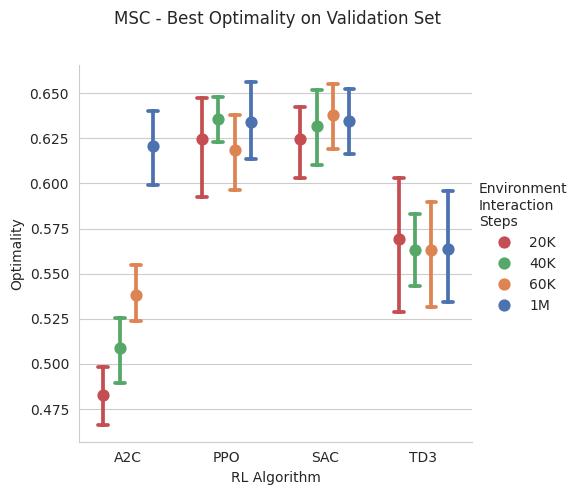

/home/giorgia/miniconda3/envs/thesis/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


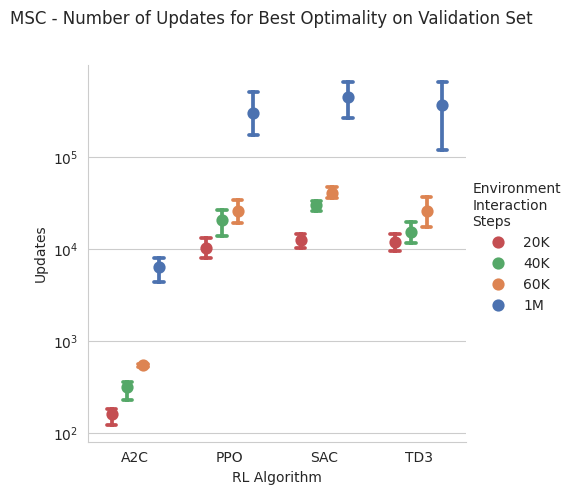

/home/giorgia/miniconda3/envs/thesis/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


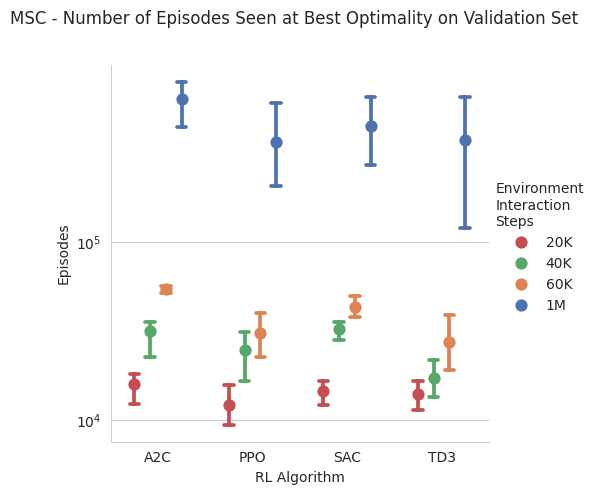

/home/giorgia/miniconda3/envs/thesis/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


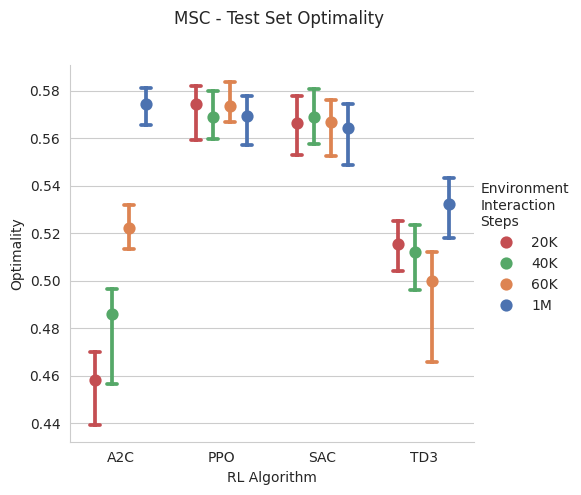

/home/giorgia/miniconda3/envs/thesis/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


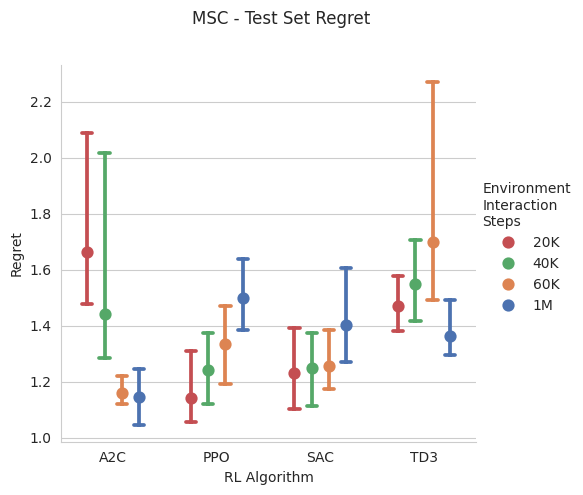

In [4]:
t = 'MSC - '
metric_dict = {'best/optimality': t + 'Best Optimality on Validation Set',
               'best/updates': t + 'Number of Updates for Best Optimality on Validation Set',
               'best/episodes': t + 'Number of Episodes Seen at Best Optimality on Validation Set',
               'final_eval_stats/optimality': t + 'Test Set Optimality',
               'final_eval_stats/regret': t + 'Test Set Regret'}
            
plot_ci(df_msc, 'model.policy', metric_dict,'total_frames' , save_path=save_path, log_scale=['best/updates', 'best/episodes'],
        hue_order=defaut_hue_order['MSC'])

In the **Set Multi-cover** (MSC) environment every interaction yields a new episode. The original experiments in the UNIFY paper trained an A2C agent for 1 million frames (environment interaction) performing an update every 100 episodes; here all the algorithms were also trained on fewer frames since the aim of the experiments is to get the most efficient results in terms of number of updates to the networks and number of episodes seen during training. Periodically during training, the current policy is evaluated on the validation set: whenever an optimality improvement occurs, the best policy is updated and the number of network updates and episodes are recorded. At the end of the training, the best policy is evaluated on the test set.

The results show that PPO and SAC are the best performing and the most efficient algorithms in terms of number of updates to the networks and number of episodes seen during training, given that they achieve good optimality (greater than 60%) on the validation set during shorter runs (20k frames). A2c is able to achieve the same results, but it requires to be trained for more frames (1 million), while TD3 performs slightly worse than the other algorithms, due to its limitations in terms of exploration and the policy being deterministic.

## EMS Sequential Analysis
Results presented in the following section are obtained from 5 different seeds and different number of total frames (environment interactions), moreover they differ on the number of instances used during training (1, 5 and 30 instances) in order to investigate the efficiency of the algorithms in learning from multiple instances.
Differently from the original experiemnts in the UNIFY paper, where the algorithms are validated and tested on the same training instance, here the algorithms are validated and tested on different instances in order to evaluate the generalization capabilities of the algorithms (20 instances in the validation set and 100 in the test set).

In [5]:
sweep_ids = ['rp6ot250', 'lxvvoggr', # A2C
             'rzo844dz', 'kyxlhxrm', '7gxlcmhx', # PPO
             'sx539wvn', '1ebv36q3', # SAC
             '1rem9crx', 'b3bpd9k7'] # TD3
other_store_keys = []
other_metrics = ['final_eval_stats/optimality',]
save_path = get_save_path('final', sweep_ids)
df_ems_seq = load_data(save_path, sweep_ids, other_store_keys, other_metrics)
print(df_ems_seq.info())

Loading data from final/rp6ot250-lxvvoggr-rzo844dz-kyxlhxrm-7gxlcmhx-sx539wvn-1ebv36q3-1rem9crx-b3bpd9k7/data.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   data.problem                    320 non-null    object 
 1   model.policy                    320 non-null    object 
 2   frames_per_batch                320 non-null    int64  
 3   num_envs                        320 non-null    int64  
 4   update_rounds                   320 non-null    int64  
 5   batch_size                      320 non-null    int64  
 6   buffer_size                     320 non-null    int64  
 7   prb                             320 non-null    bool   
 8   total_frames                    320 non-null    object 
 9   actor_lr                        320 non-null    float64
 10  critic_lr                       320 non-null

In [6]:
t = 'EMS Sequential - '
col = 'data.params.instances'
metric_dict = {'best/optimality': t + 'Best Optimality on Validation Set',
               'best/updates': t + 'Number of Updates for Best Optimality on Validation Set',
               'best/episodes': t + 'Number of Episodes Seen at Best Optimality on Validation Set',
               'final_eval_stats/optimality': t + 'Test Set Optimality'}

df_ems_seq_zero_up = df_ems_seq[df_ems_seq['best/updates'] == 0]
print(f'Algorithms that fail to update the policy at all: {", ".join(df_ems_seq_zero_up["model.policy"].unique())}')
g = df_ems_seq_zero_up.groupby('model.policy')
for v in list(metric_dict.keys())+[col]:
    print(f'{v}:\n', g[v].describe(), '\n')

Algorithms that fail to update the policy at all: SAC, TD3
best/optimality:
               count      mean           std       min       25%       50%  \
model.policy                                                                
SAC             1.0  0.981061           NaN  0.981061  0.981061  0.981061   
TD3            45.0  0.985449  1.122768e-16  0.985449  0.985449  0.985449   

                   75%       max  
model.policy                      
SAC           0.981061  0.981061  
TD3           0.985449  0.985449   

best/updates:
               count  mean  std  min  25%  50%  75%  max
model.policy                                           
SAC             1.0   0.0  NaN  0.0  0.0  0.0  0.0  0.0
TD3            45.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0 

best/episodes:
               count       mean        std  min   25%   50%   75%   max
model.policy                                                          
SAC             1.0   0.000000        NaN  0.0   0.0   0.0   0.0   0.0
TD

The sequential case of the EMS environment (EMS-SEQ) is more challenging than its single-step counterpart: there are cases where the algorithms fail to update the policy at all, as shown in the table above. The SAC sample might actually be an unfortunate seed, as the other seeds show that the algorithm is able to learn without any problem. 
TD3 is the algorithm that struggles the most in this environment, since it suffers from the action saturation problem, resulting of an agent only performing actions that are either the absolute maximum or minimum value and get stuck in a local optimal policy. Different approaches were tested beforehand in order to solve this problem but none have succeeded:
- trying different types of initialization of the network's weights 
- adapting consequently the learning rate
- adding more noise to the exploration policy
- adding weight decay
- trying different actor network architecture 

/home/giorgia/miniconda3/envs/thesis/lib/python3.10/site-packages/scipy/stats/_resampling.py:100: DegenerateDataWarning: The BCa confidence interval cannot be calculated. This problem is known to occur when the distribution is degenerate or the statistic is np.min.
  warnings.warn(DegenerateDataWarning(msg))
/home/giorgia/miniconda3/envs/thesis/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


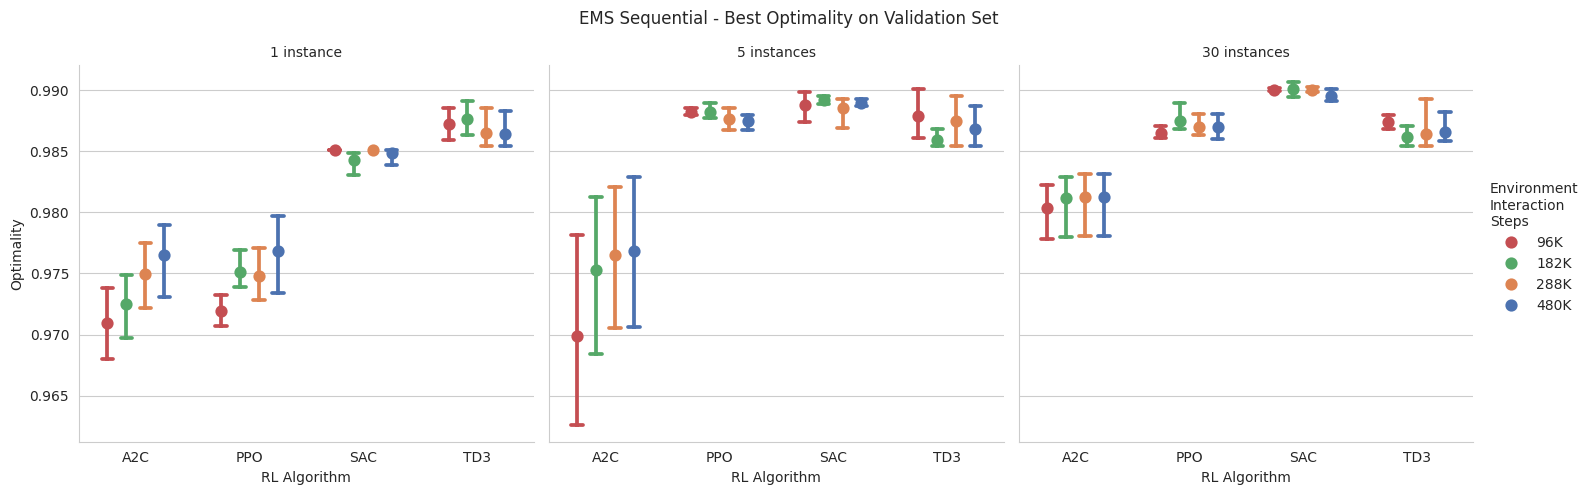

/home/giorgia/miniconda3/envs/thesis/lib/python3.10/site-packages/scipy/stats/_resampling.py:100: DegenerateDataWarning: The BCa confidence interval cannot be calculated. This problem is known to occur when the distribution is degenerate or the statistic is np.min.
  warnings.warn(DegenerateDataWarning(msg))
/home/giorgia/miniconda3/envs/thesis/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


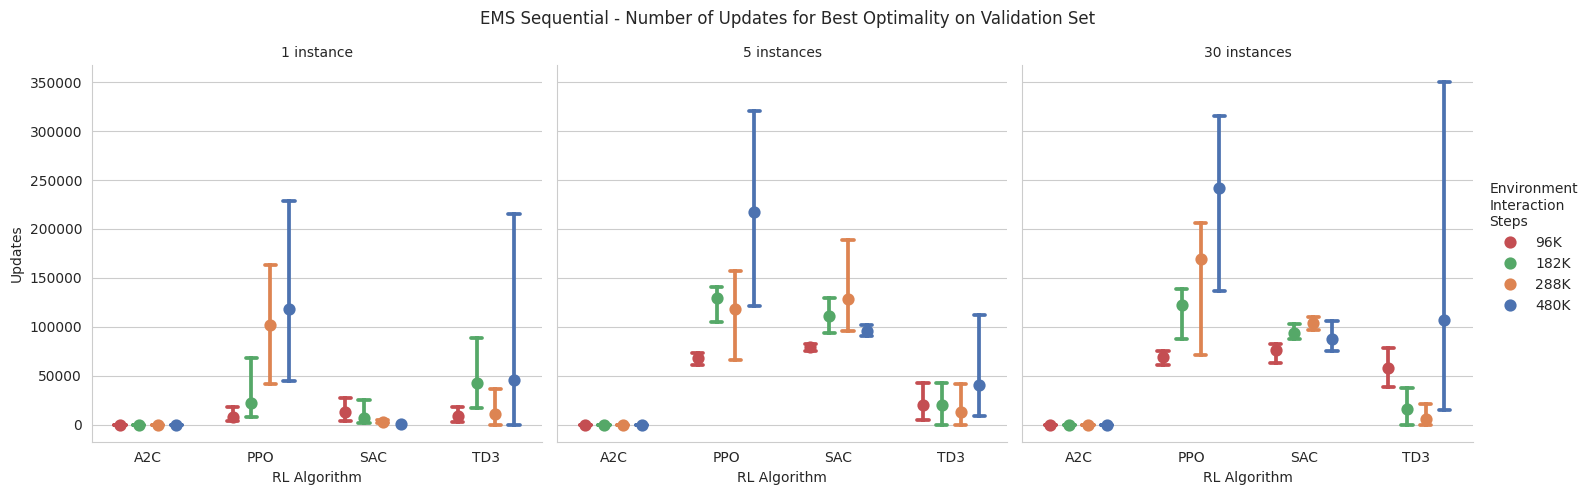

/home/giorgia/miniconda3/envs/thesis/lib/python3.10/site-packages/scipy/stats/_resampling.py:100: DegenerateDataWarning: The BCa confidence interval cannot be calculated. This problem is known to occur when the distribution is degenerate or the statistic is np.min.
  warnings.warn(DegenerateDataWarning(msg))
/home/giorgia/miniconda3/envs/thesis/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


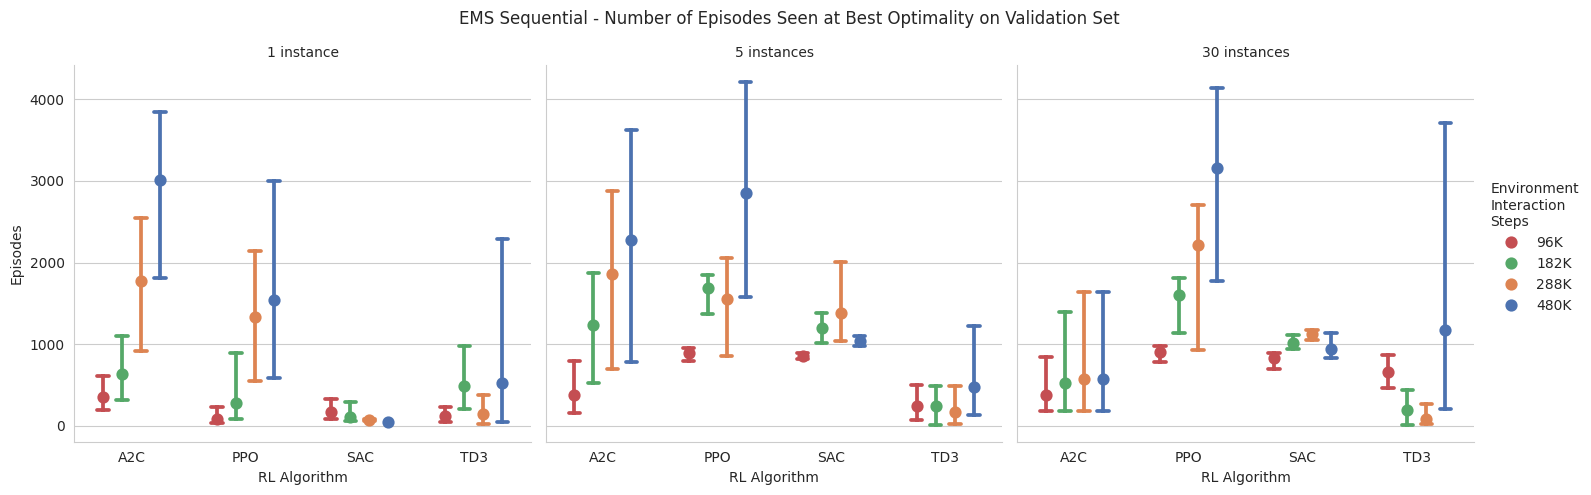

/home/giorgia/miniconda3/envs/thesis/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


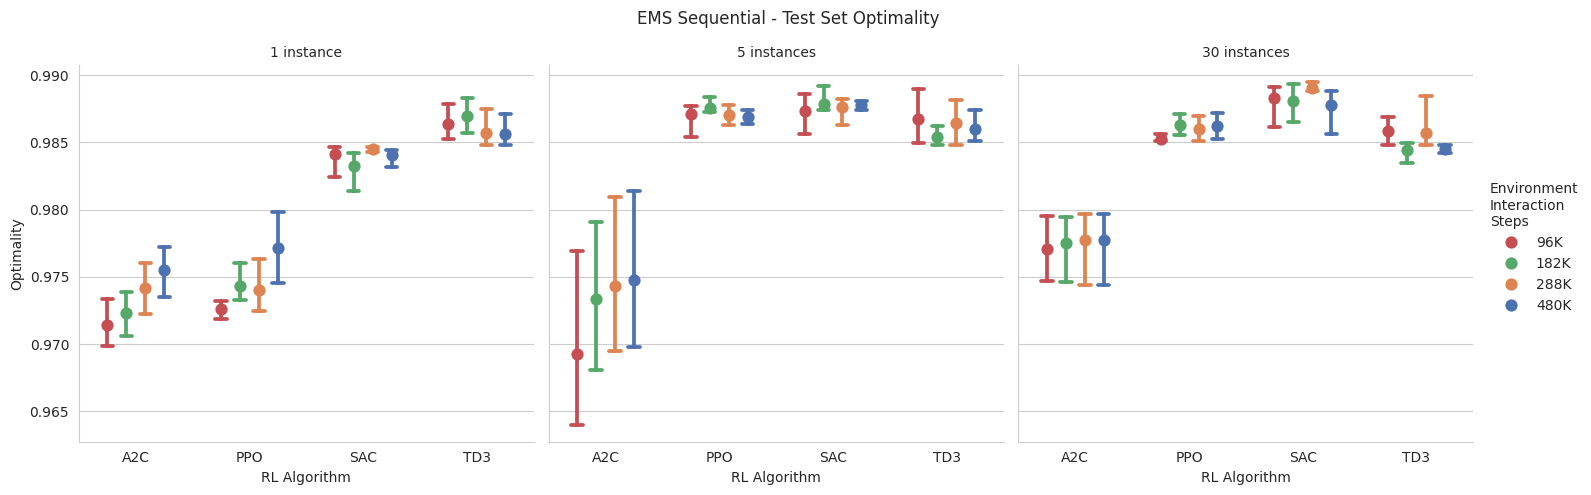

In [7]:
plot_ci(df_ems_seq, 'model.policy', metric_dict, 'total_frames', col=col, save_path=save_path, 
        hue_order=defaut_hue_order['EMS Sequential'], col_order=defaut_col_order)

In the **EMS Sequential** (EMS-SEQ) environment, the algorithms are trained in a sequential setting, where the episodes last for 96 steps. The original experiments in the UNIFY paper trained an A2C agent on a single instance for 182400 frames (environment interaction) performing an update every 100 episodes; here all the algorithms were trained on fewer and more frames. Periodically during training, the current policy is evaluated on the validation set: whenever an optimality improvement occurs, the best policy is updated and the number of network updates and episodes are recorded. At the end of the training, the best policy is evaluated on the test set.

Results show that every algorithm struggles to learn and generalize when trained on a single instance, while the multi-instance setting (5 and 30 instances) allows the algorithms to learn and generalize better, except TD3 that has a stable behaviour due to previously mentioned limitations. PPO suffers the most from the single instance setting and even if its performances get better in the multi-instance setting, it's still the most inefficient in terms of number of updates to the networks and number of episodes seen during training. On the other hand, SAC is the most efficient algorithm and also the best performing. A2C has poor performances overall, even though the multi-instance setting seems to help the generalization capabilities of the algorithm.

## EMS Single Step Analysis
Results presented in the following section are obtained from 5 different seeds and different number of total frames (environment interactions), moreover they differ on the number of instances used during training (1, 5 and 30 instances) in order to investigate the efficiency of the algorithms in learning from multiple instances.
Differently from the original experiemnts in the UNIFY paper, where the algorithms are validated and tested on the same training instance, here the algorithms are validated and tested on different instances in order to evaluate the generalization capabilities of the algorithms (20 instances in the validation set and 100 in the test set).

In [8]:
sweep_ids = ['coew847l', 'luca3mzb', # A2C
             '4mvrl76c', '384qr2h7', 'olbyl2un'] # PPO, SAC, TD3
other_store_keys = []
other_metrics = ['final_eval_stats/optimality',]
save_path = get_save_path('final', sweep_ids)
df_ems_ss = load_data(save_path, sweep_ids, other_store_keys, other_metrics)
df_ems_ss = df_ems_ss[df_ems_ss['total_frames'] != '37K']
print(df_ems_ss.info())

Loading data from final/coew847l-luca3mzb-4mvrl76c-384qr2h7-olbyl2un/data.csv
<class 'pandas.core.frame.DataFrame'>
Index: 240 entries, 0 to 259
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   data.problem                    240 non-null    object 
 1   model.policy                    240 non-null    object 
 2   frames_per_batch                240 non-null    int64  
 3   num_envs                        240 non-null    int64  
 4   update_rounds                   240 non-null    int64  
 5   batch_size                      240 non-null    int64  
 6   buffer_size                     240 non-null    int64  
 7   prb                             240 non-null    bool   
 8   total_frames                    240 non-null    object 
 9   actor_lr                        240 non-null    float64
 10  critic_lr                       240 non-null    float64
 11  schedule_lr             

/home/giorgia/miniconda3/envs/thesis/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


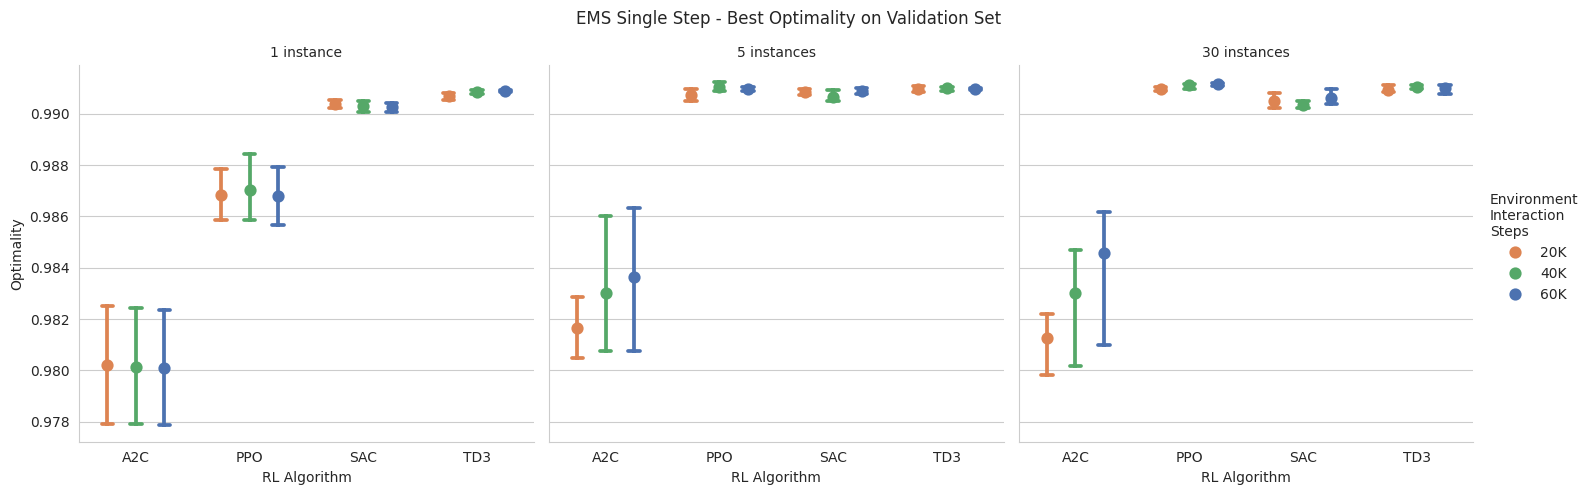

/home/giorgia/miniconda3/envs/thesis/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


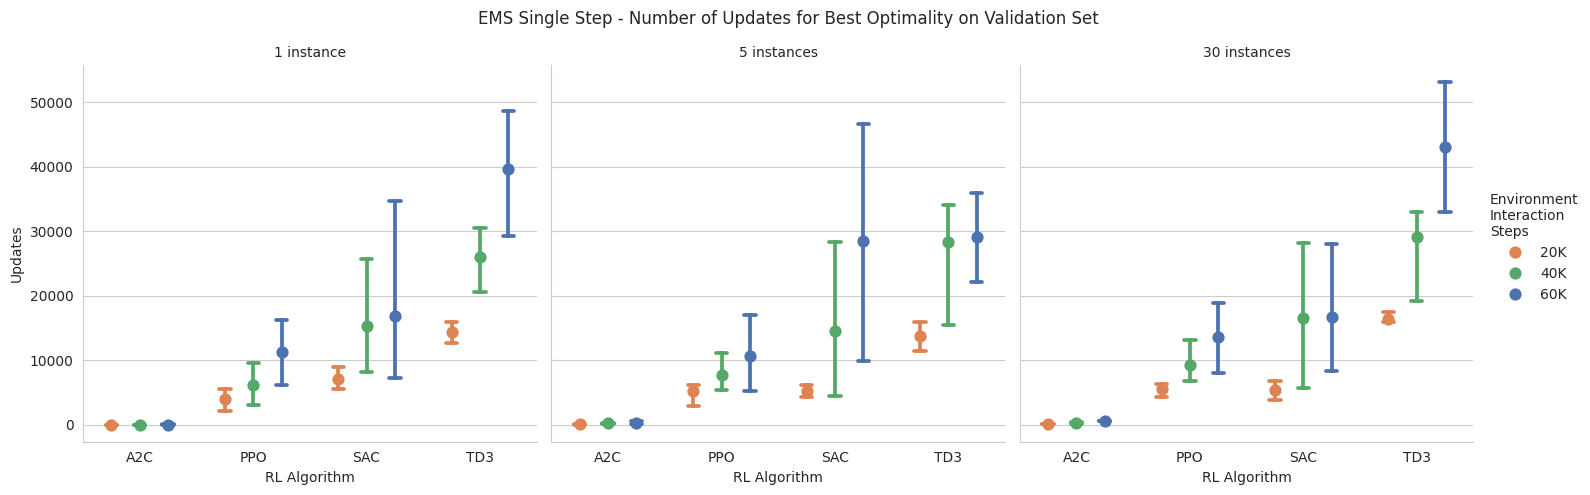

/home/giorgia/miniconda3/envs/thesis/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


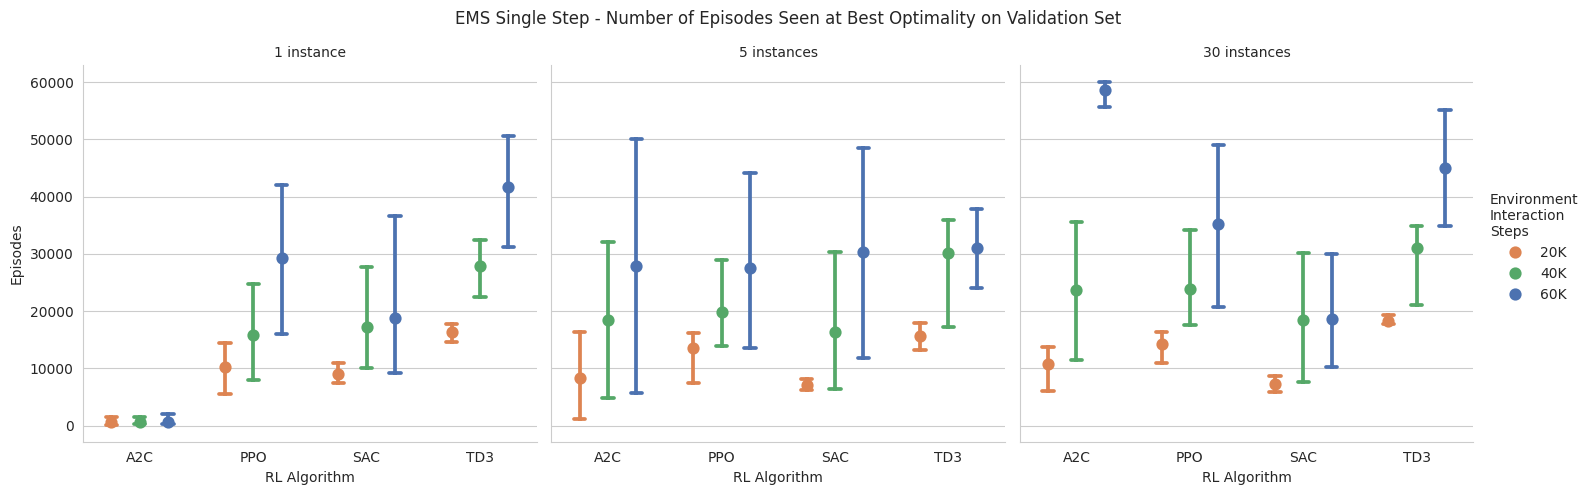

/home/giorgia/miniconda3/envs/thesis/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


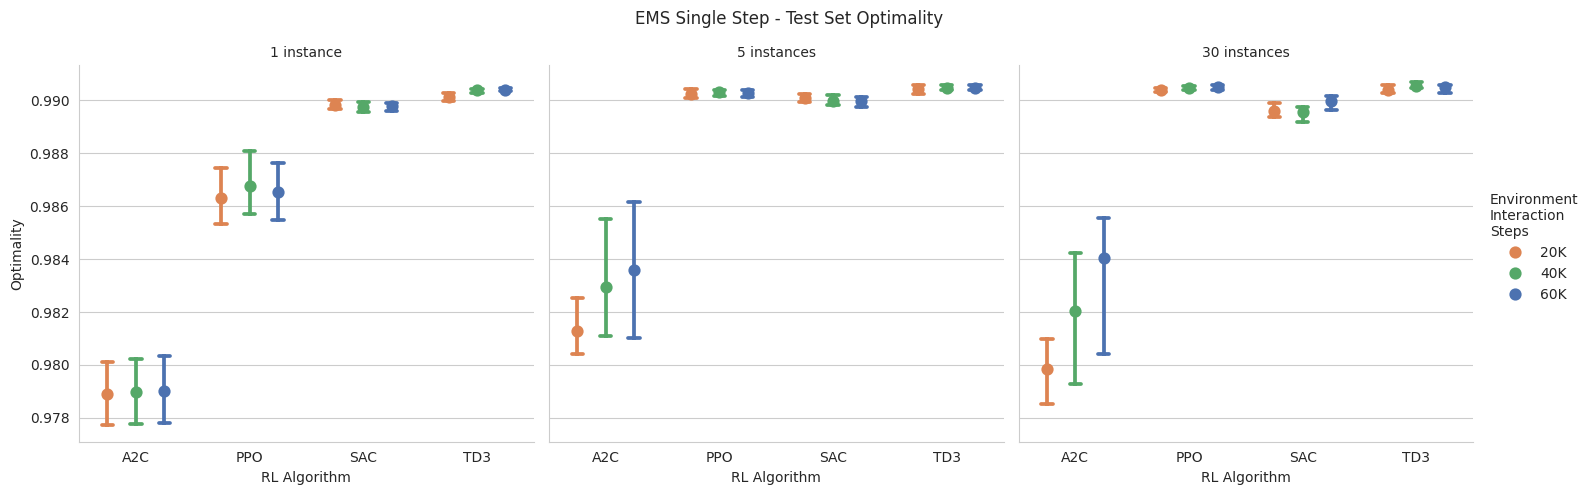

In [10]:
t = 'EMS Single Step - '
col = 'data.params.instances'
metric_dict = {'best/optimality': t + 'Best Optimality on Validation Set',
               'best/updates': t + 'Number of Updates for Best Optimality on Validation Set',
               'best/episodes': t + 'Number of Episodes Seen at Best Optimality on Validation Set',
               'final_eval_stats/optimality': t + 'Test Set Optimality'}

plot_ci(df_ems_ss, 'model.policy', metric_dict, 'total_frames', col=col, save_path=save_path,
        hue_order=defaut_hue_order['EMS Single Step'], col_order=defaut_col_order)

In the **EMS Single-Step** (EMS-SS) environment, every interaction yields a new episode, since the 96 steps are performed at once. The original experiments in the UNIFY paper trained an A2C agent on a single instance for 37000 frames (environment interactions) performing an update every 100 episodes; in our experiments all the algorithms are trained on 20k, 40k and 60k frames. Periodically during training, the current policy is evaluated on the validation set: whenever an optimality improvement occurs, the best policy is updated and the number of network updates and episodes are recorded. At the end of the training, the best policy is evaluated on the test set.

Results show that PPO still struggles in the single instance setting, with respect to SAC and TD3 which perform well even when trained on a single instance. A2C has poor performances overall, even though the multi-instance setting seems to help the generalization capabilities of the resulting policy. TD3 is the least efficient in terms of number of updates to the networks and number of episodes seen during training. 
In the multi-instance setting, SAC and PPO perform similarly: the latter is more efficient in terms of number of updates to the networks while the former is more efficient on the number of episodes seen during training. 

All the environments presented in the study have to solve an optimization problem at every time step, making the environment interaction an expensive computational operation. It is preferable to have an algorithm that is more sample efficient, namely that needs fewer episodes to learn a good policy, rather than an algorithm that is more efficient in terms of number of updates to the networks.